### Description of our Data:

ph: pH of water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption.

In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz


In [527]:
d = pd.read_csv("./datasets/water_potability.csv")

## Exploratory Data Analysis

In [528]:
d.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [529]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [530]:
d.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [531]:
d.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [532]:
d[d['Potability'] == 0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [533]:
d[d['Potability'] == 1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

We can see that there are differences in the classes, even if they are minute

## Data Imputation

We can fill the code with inferred values since the amount of missing data is not too large. 

In [534]:
t1 = d[d['Potability'] == 0][['ph', 'Sulfate', 'Trihalomethanes']].median()
t2 = d[d['Potability'] == 1][['ph', 'Sulfate', 'Trihalomethanes']].median()
print("Median of Class 0 values:\n", t1,"\n\nMedian of Class 1 values:\n", t2)

Median of Class 0 values:
 ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64 

Median of Class 1 values:
 ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64


The values of median barely differ between the two classes, so we can just impute the dataset with the median

In [535]:
d['ph'].fillna(d['ph'].median(), inplace=True)
d['Sulfate'].fillna(d['Sulfate'].median(), inplace=True)
d['Trihalomethanes'].fillna(d['Trihalomethanes'].median(), inplace=True)

In [536]:
d.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

## Additional EDA

Analyzing the data using Sweetviz, we get a full visual of the data

In [537]:
report = sweetviz.analyze(d)

                                             |          | [  0%]   00:00 -> (? left)

In [538]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [539]:
d.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Data Visualisation

<Figure size 1000x1000 with 0 Axes>

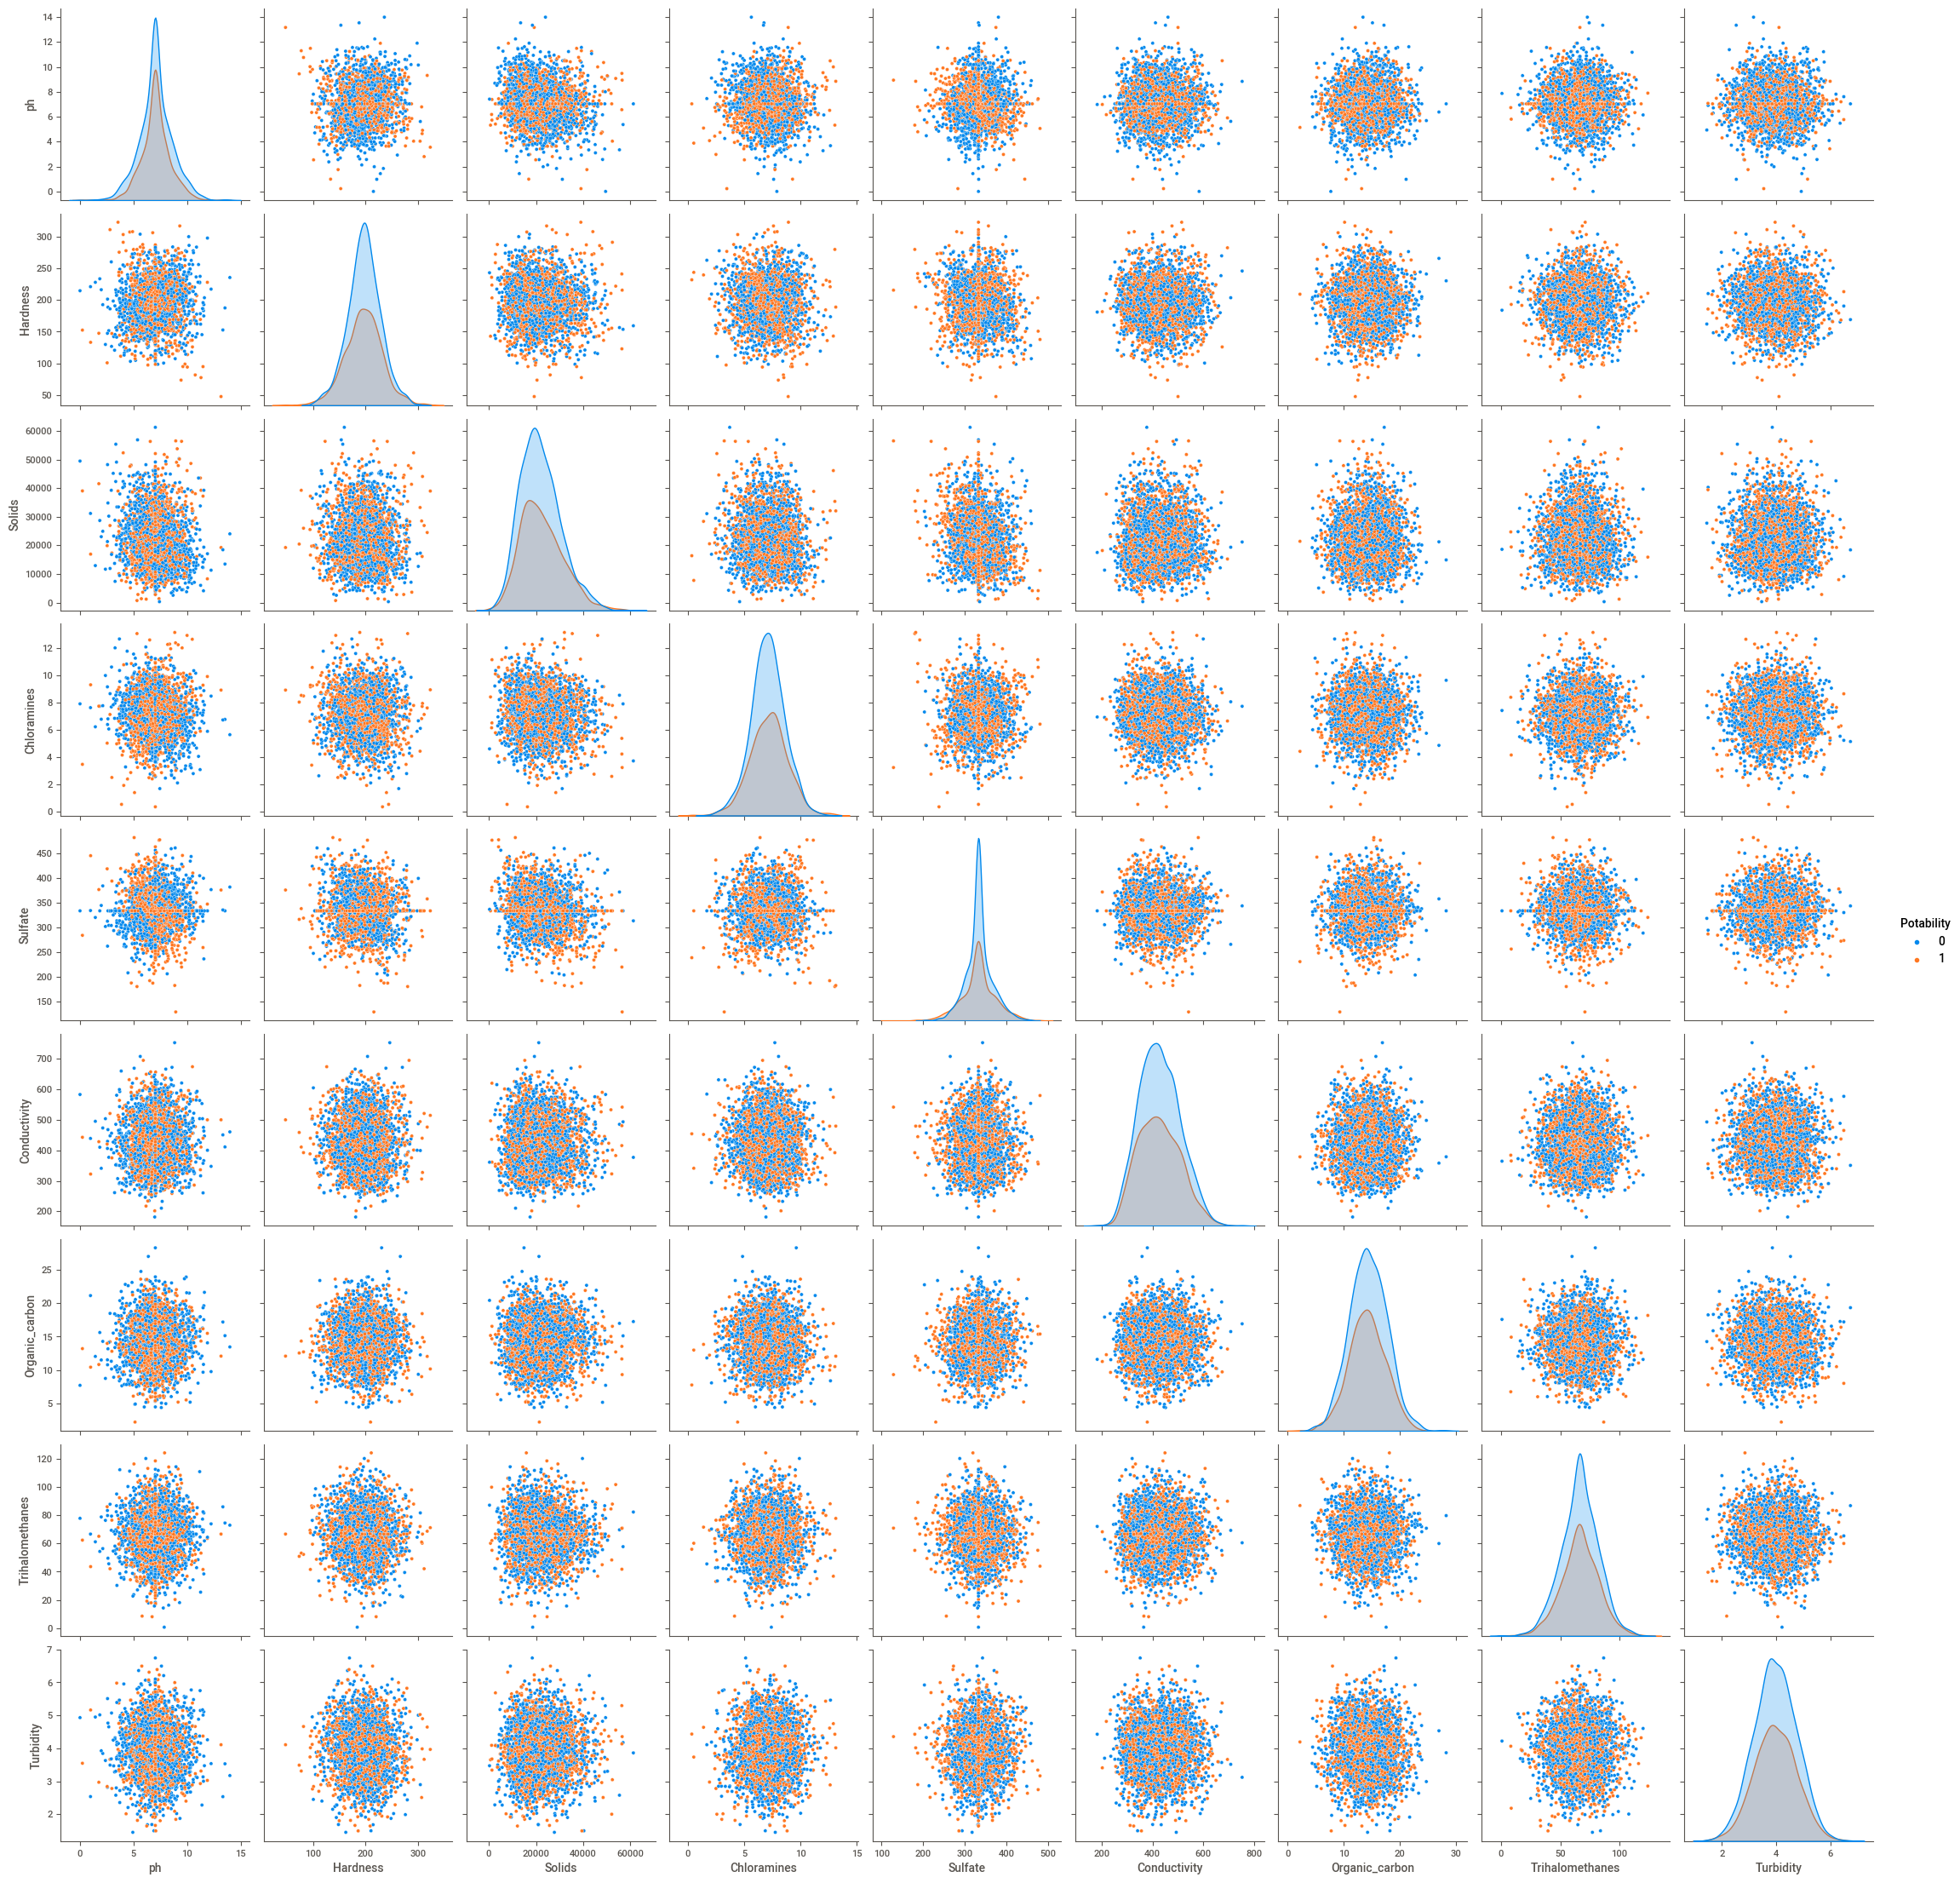

In [540]:
plt.figure(figsize=(10,10))
sns.pairplot(d, hue='Potability')
plt.show()

We can see that the data is all very close together and the classes are not easily separable

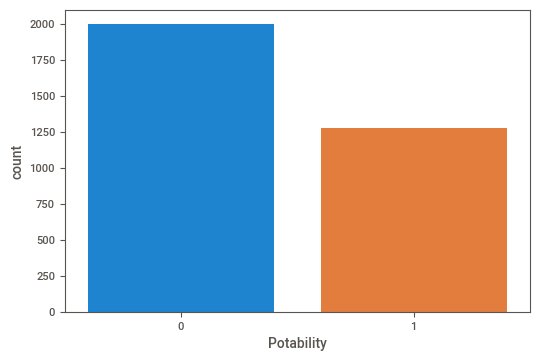

In [541]:
sns.countplot(data=d, x='Potability')
plt.show()

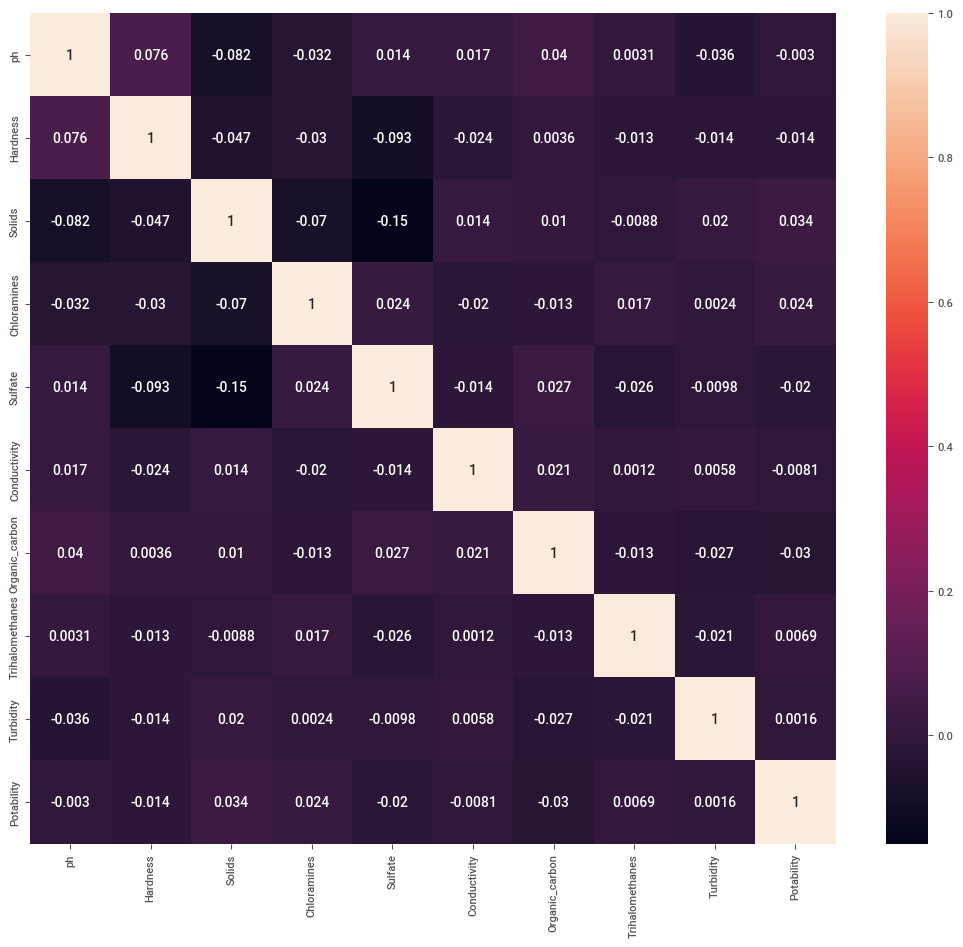

In [542]:
c = d.corr()
plt.figure(figsize=(13,11))
sns.heatmap(c, annot=True)
plt.show()

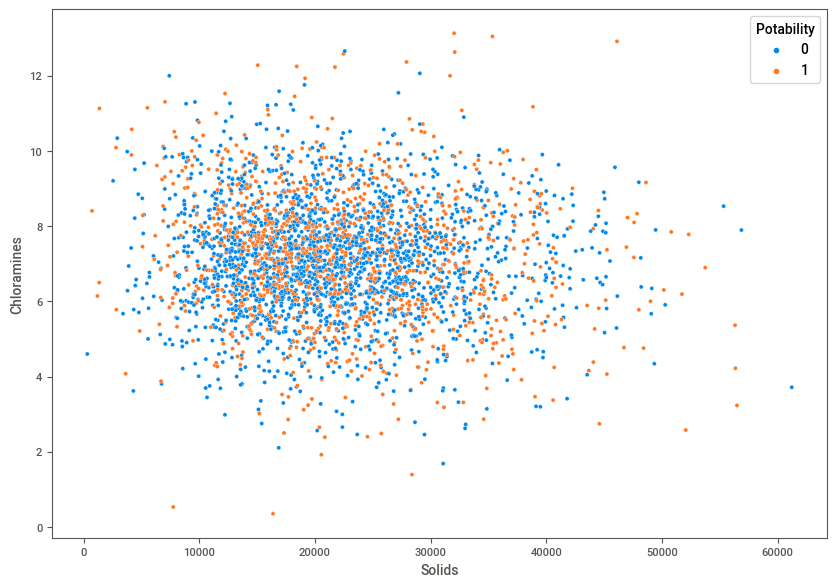

In [543]:

plt.figure(figsize=(10,7))
sns.scatterplot(data=d,x='Solids', y='Chloramines', hue='Potability')
plt.show()


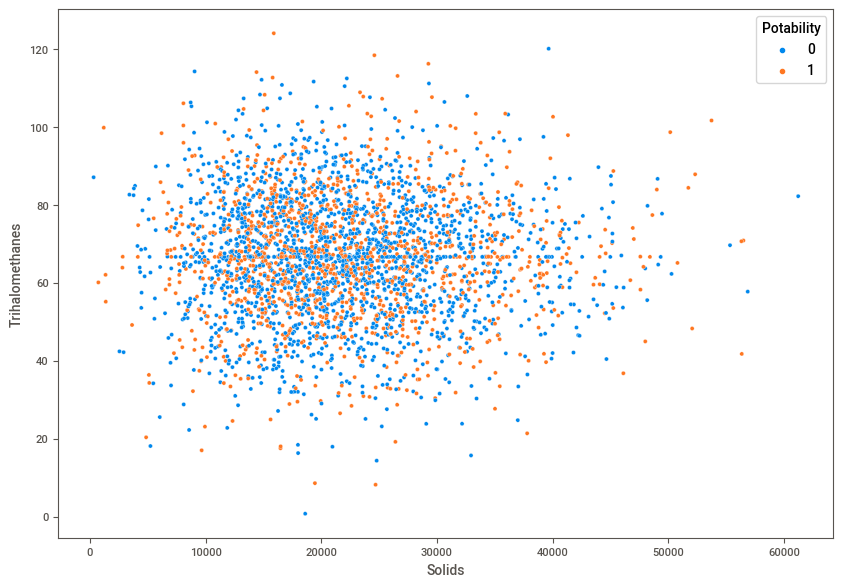

In [544]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=d,x='Solids', y='Trihalomethanes', hue='Potability')
plt.show()


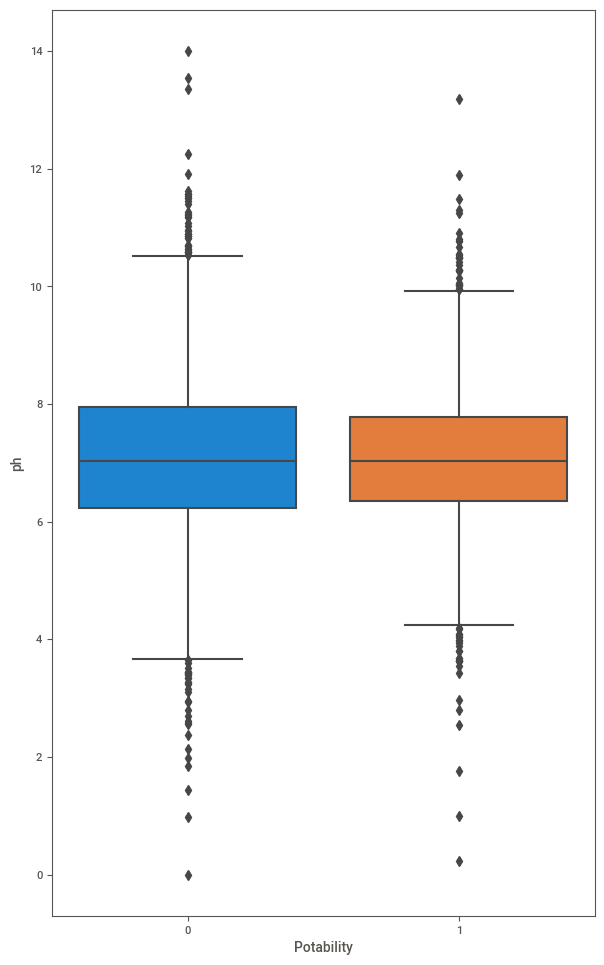

In [545]:
plt.figure(figsize=(7,12))
sns.boxplot(data=d,y='ph', x='Potability')
plt.show()

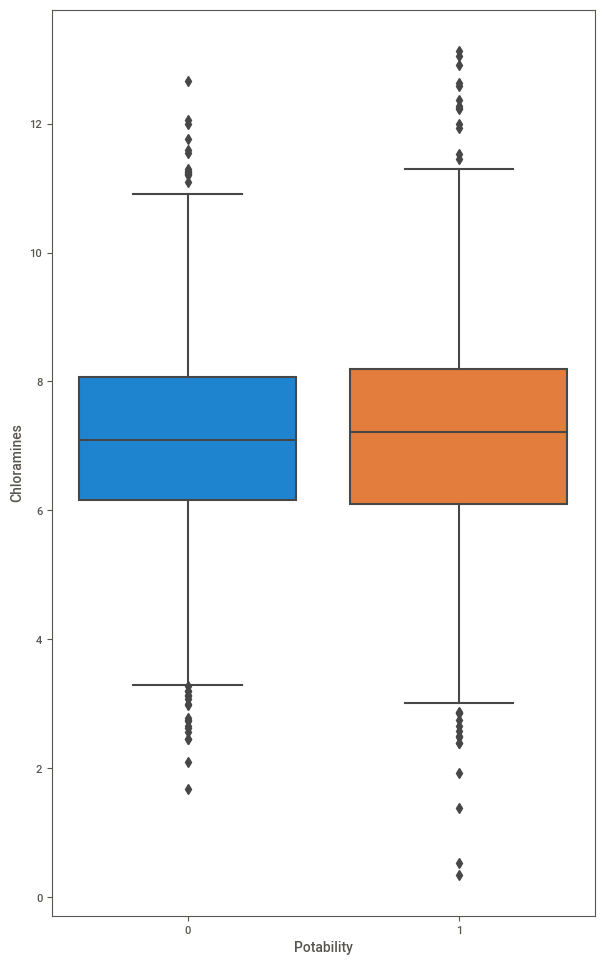

In [546]:
plt.figure(figsize=(7,12))
sns.boxplot(data=d,y='Chloramines', x='Potability')
plt.show()

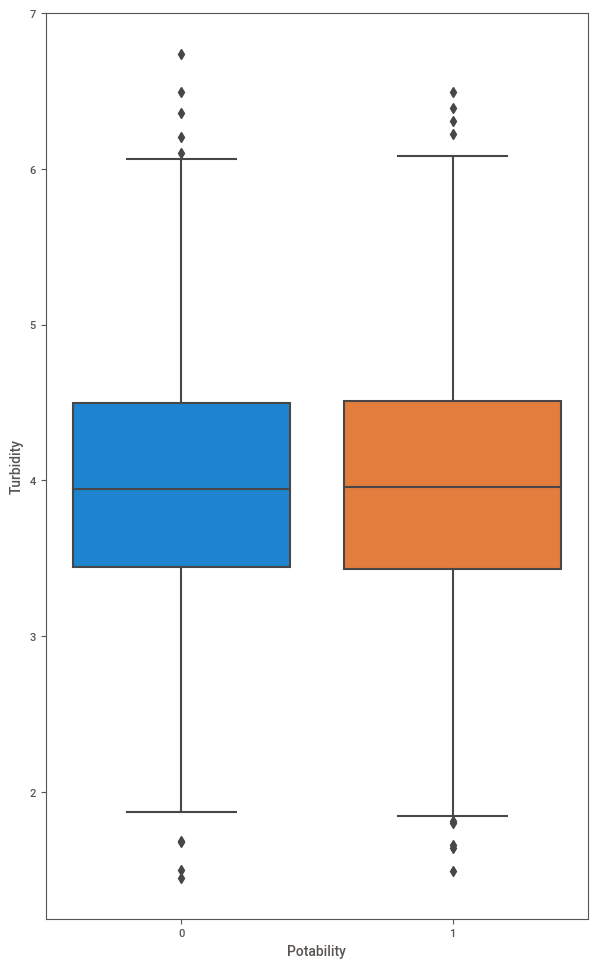

In [547]:
plt.figure(figsize=(7,12))
sns.boxplot(data=d,y='Turbidity', x='Potability')
plt.show()

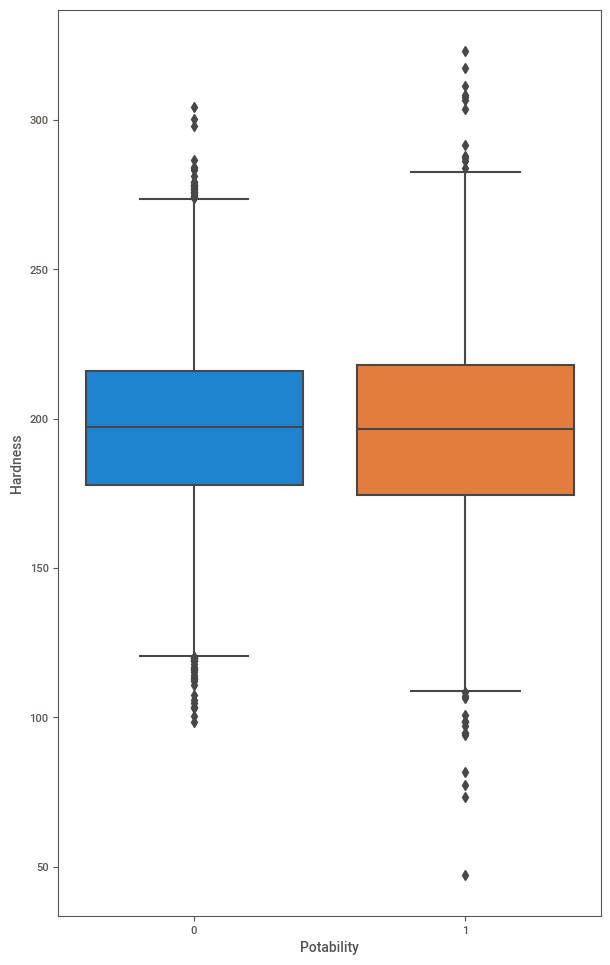

In [548]:
plt.figure(figsize=(7,12))
sns.boxplot(data=d,y='Hardness', x='Potability')
plt.show()

In [549]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [550]:
x = d.iloc[:,:-1]
y = d.iloc[:,-1]

In [551]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)


The dataset consists of a lot of columns with high variance, so we can scale them down for better results

In [552]:
s = StandardScaler()
xtrain = s.fit_transform(xtrain)
xtest = s.fit_transform(xtest)

In [553]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Random Forest Classifier

In [554]:
lr = RandomForestClassifier()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

0.6646341463414634


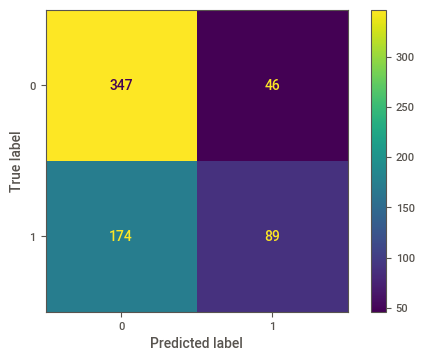

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       393
           1       0.66      0.34      0.45       263

    accuracy                           0.66       656
   macro avg       0.66      0.61      0.60       656
weighted avg       0.66      0.66      0.63       656



In [555]:
ans = []
for i in ypred:
    if i > 0.5:
        ans.append(1)
    else:
        ans.append(0)

print(accuracy_score(ans,ytest))
ConfusionMatrixDisplay(confusion_matrix(ytest,ans)).plot()
plt.show()

print(classification_report(ytest, ans))

## XG-Boost Classifier

In [556]:
lr = GradientBoostingClassifier()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

0.6478658536585366


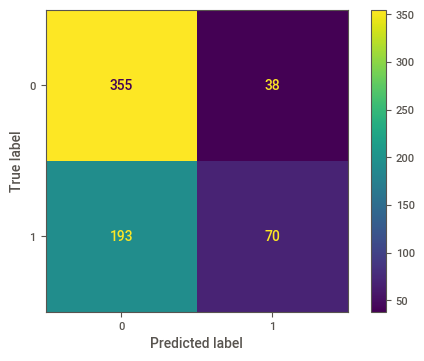

              precision    recall  f1-score   support

           0       0.65      0.90      0.75       393
           1       0.65      0.27      0.38       263

    accuracy                           0.65       656
   macro avg       0.65      0.58      0.57       656
weighted avg       0.65      0.65      0.60       656



In [557]:
ans = []
for i in ypred:
    if i > 0.6:
        ans.append(1)
    else:
        ans.append(0)

print(accuracy_score(ans,ytest))
ConfusionMatrixDisplay(confusion_matrix(ytest,ans)).plot()
plt.show()

print(classification_report(ytest, ans))

## Neural Network Approach

In [558]:
from tensorflow import keras
from keras import *
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam

In [569]:
model = Sequential([
    layers.Dense(32, input_shape=(9,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
    ])


model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.000001), metrics=['accuracy'])

In [570]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest,ytest),epochs=200, batch_size=128)

Epoch 1/200


2023-03-08 16:51:28.768712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.3874

2023-03-08 16:51:30.159470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 59ms/step - loss: 0.6961 - accuracy: 0.3874 - val_loss: 0.6951 - val_accuracy: 0.4009
Epoch 2/200
21/21 [==============================] - 1s 27ms/step - loss: 0.6952 - accuracy: 0.4000 - val_loss: 0.6944 - val_accuracy: 0.4207
Epoch 3/200
21/21 [==============================] - 0s 19ms/step - loss: 0.6944 - accuracy: 0.4328 - val_loss: 0.6937 - val_accuracy: 0.4451
Epoch 4/200
21/21 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.4714 - val_loss: 0.6931 - val_accuracy: 0.4893
Epoch 5/200
21/21 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.5141 - val_loss: 0.6924 - val_accuracy: 0.5457
Epoch 6/200
21/21 [==============================] - 0s 16ms/step - loss: 0.6921 - accuracy: 0.5573 - val_loss: 0.6918 - val_accuracy: 0.5777
Epoch 7/200
21/21 [==============================] - 0s 16ms/step - loss: 0.6914 - accuracy: 0.5855 - val_loss: 0.6913 - val_accuracy: 0.6113
Epoch 8/200
21/21 

In [571]:
res = model.predict(xtest)
ans = []

for i in res:
    if i > 0.5:
        ans.append(1)
    else:
        ans.append(0)

13/21 [=================>............] - ETA: 0s

2023-03-08 16:52:30.338537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 8ms/step


0.6478658536585366


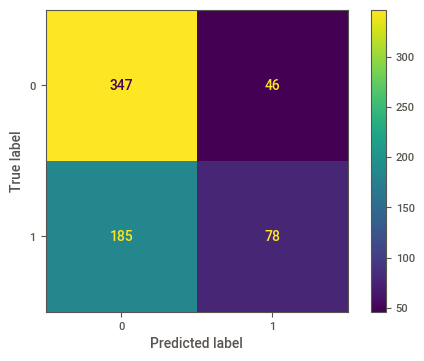

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       393
           1       0.63      0.30      0.40       263

    accuracy                           0.65       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.64      0.65      0.61       656



In [572]:
print(accuracy_score(ans,ytest))
ConfusionMatrixDisplay(confusion_matrix(ytest,ans)).plot()
plt.show()

print(classification_report(ytest, ans))

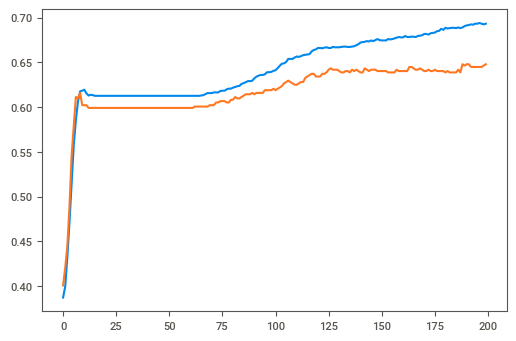

In [573]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

As we can see, we have achieved around 65% accuracy with each model. The neural network generally has the most stable performance, but the random forest classifier has better results.
The inferences from this data are as below

